In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import os
import numpy as np
import seaborn as sns
from google.colab import autoviz

In [161]:
data = "/content/drive/MyDrive/EGD-Barcelona/data"

In [162]:
subfolder_names = ["Esofago","Fundus","Cuerpo","Antro","Duodeno"]

In [164]:
dfs = []

for subfolder in subfolder_names:
    subfolder_path = os.path.join(data, subfolder)

    label_files = [os.path.join(subfolder_path, f) for f in os.listdir(subfolder_path) if f.endswith(".xlsx")]
    for file in label_files:
        df = pd.read_excel(file, header=0)
        dfs.append(df)


In [165]:
dataframes = []

columns_to_drop = ['Unnamed: 9','Unnamed: 10','Unnamed: 11']

# Check if the column exists in the DataFrame

for df in dfs:
    for column_to_drop in columns_to_drop:
        if column_to_drop in df.columns:
            df = df.drop(column_to_drop, axis=1)
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])
    df=df.drop(df.columns[0], axis=1)
    dataframes.append(df)

In [179]:
def final_histogram(df, colname, ax, title, mpl_palette_name='Dark2'):
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), ax=ax)
  ax.spines[['top', 'right',]].set_visible(False)
  ax.set_title(title,fontsize=20)
  ax.set_ylabel(colname, fontsize=16)

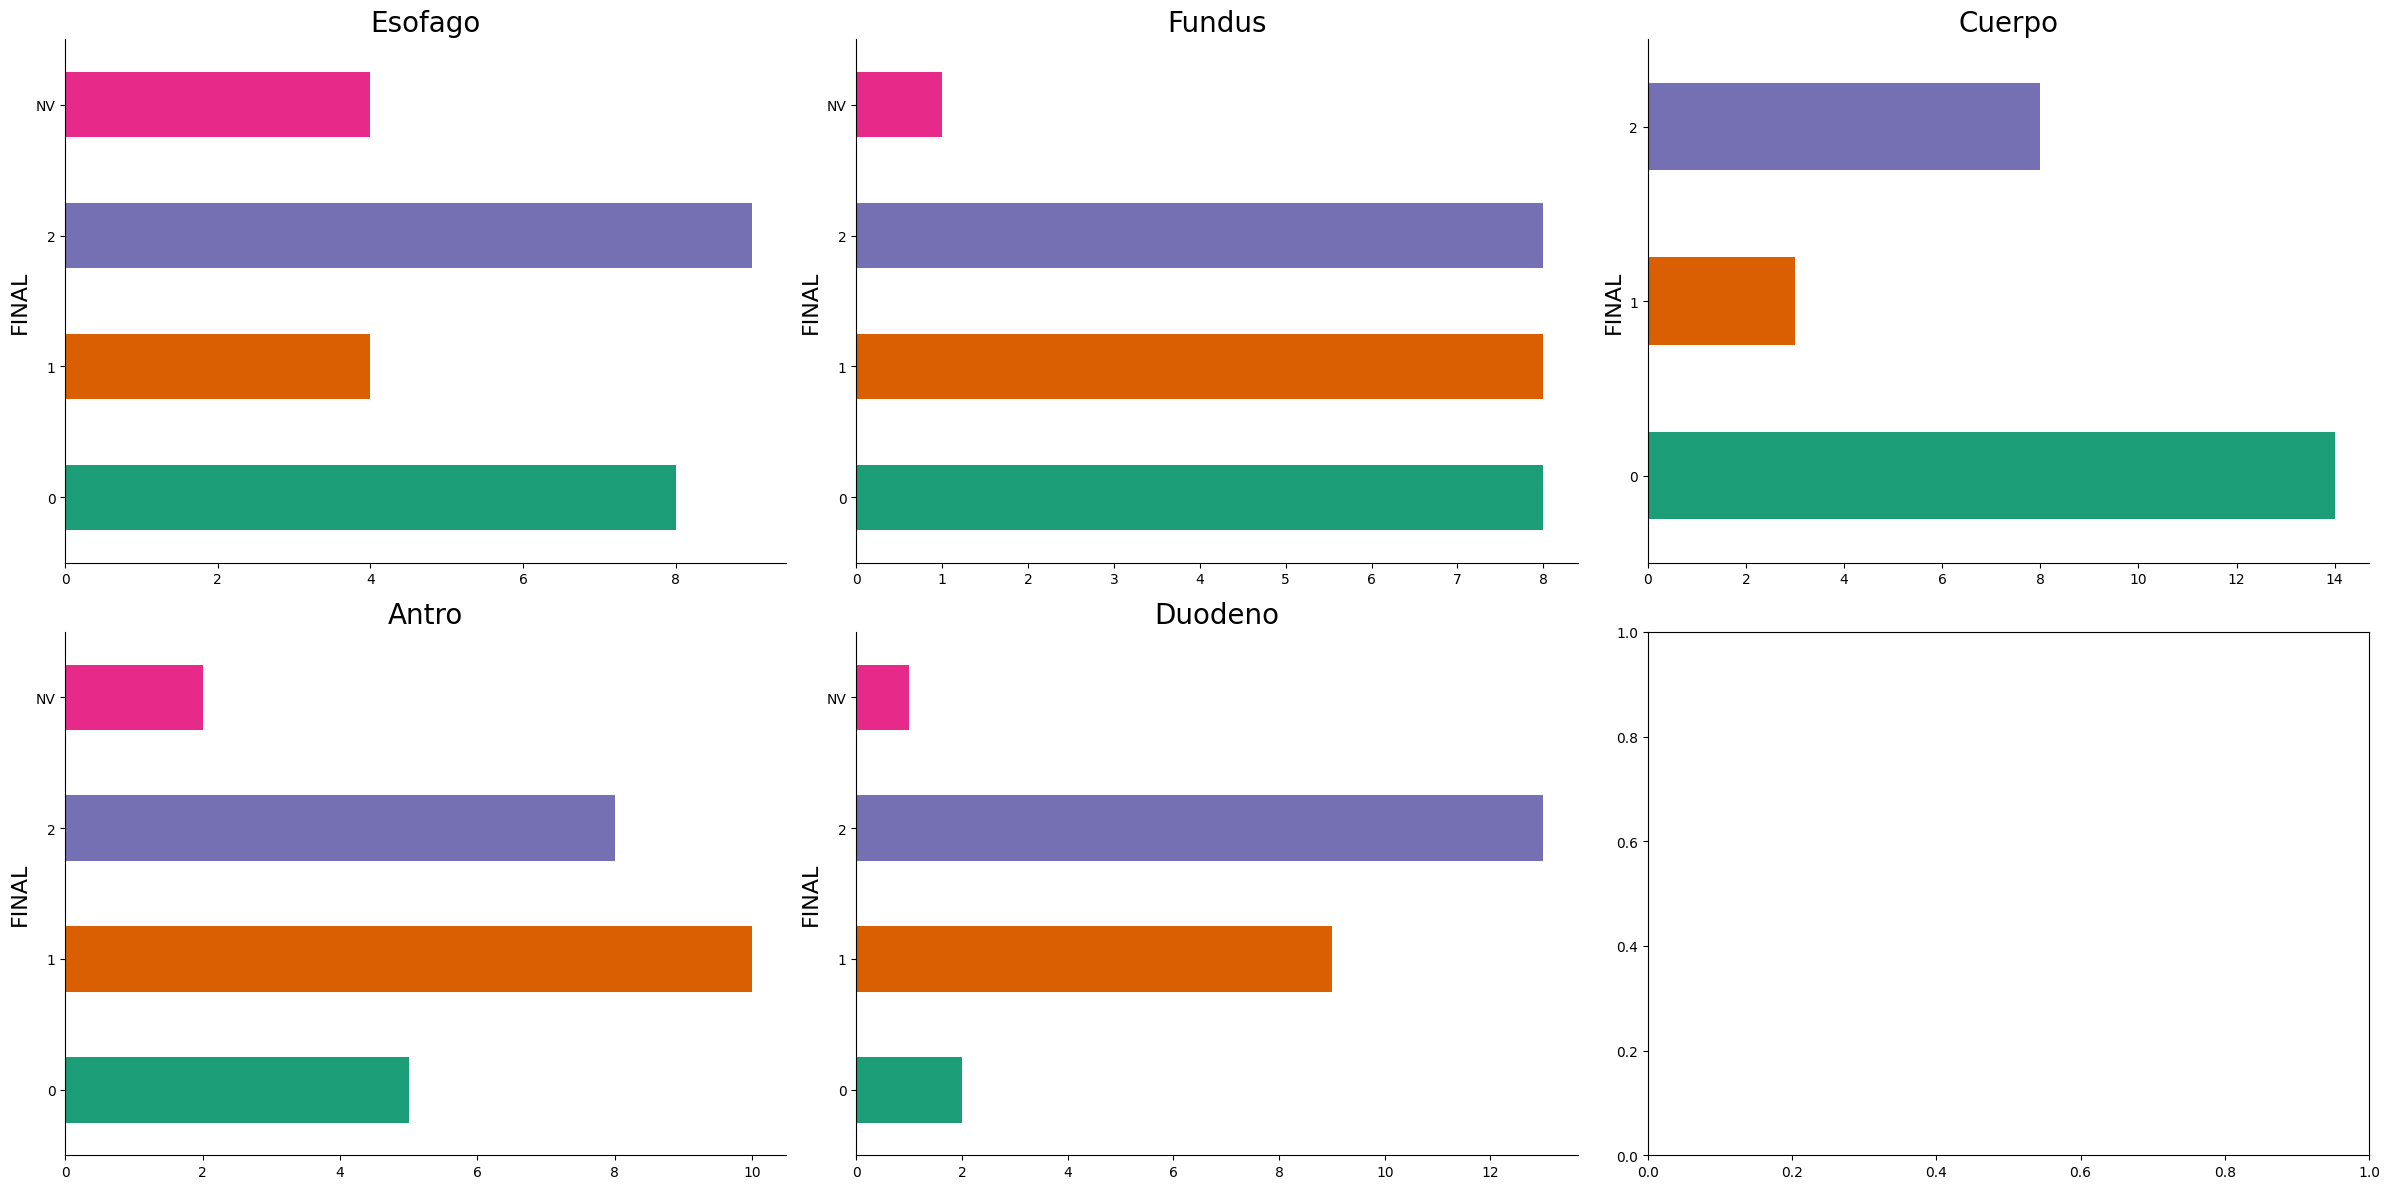

In [180]:
fig, axs = plt.subplots(2, 3, figsize=(24, 12))
axs = axs.flatten()

titles = subfolder_names
for i, df in enumerate(dataframes):
    categorical_histogram(df, *['FINAL'], ax=axs[i], title=titles[i])

plt.tight_layout()
plt.show()


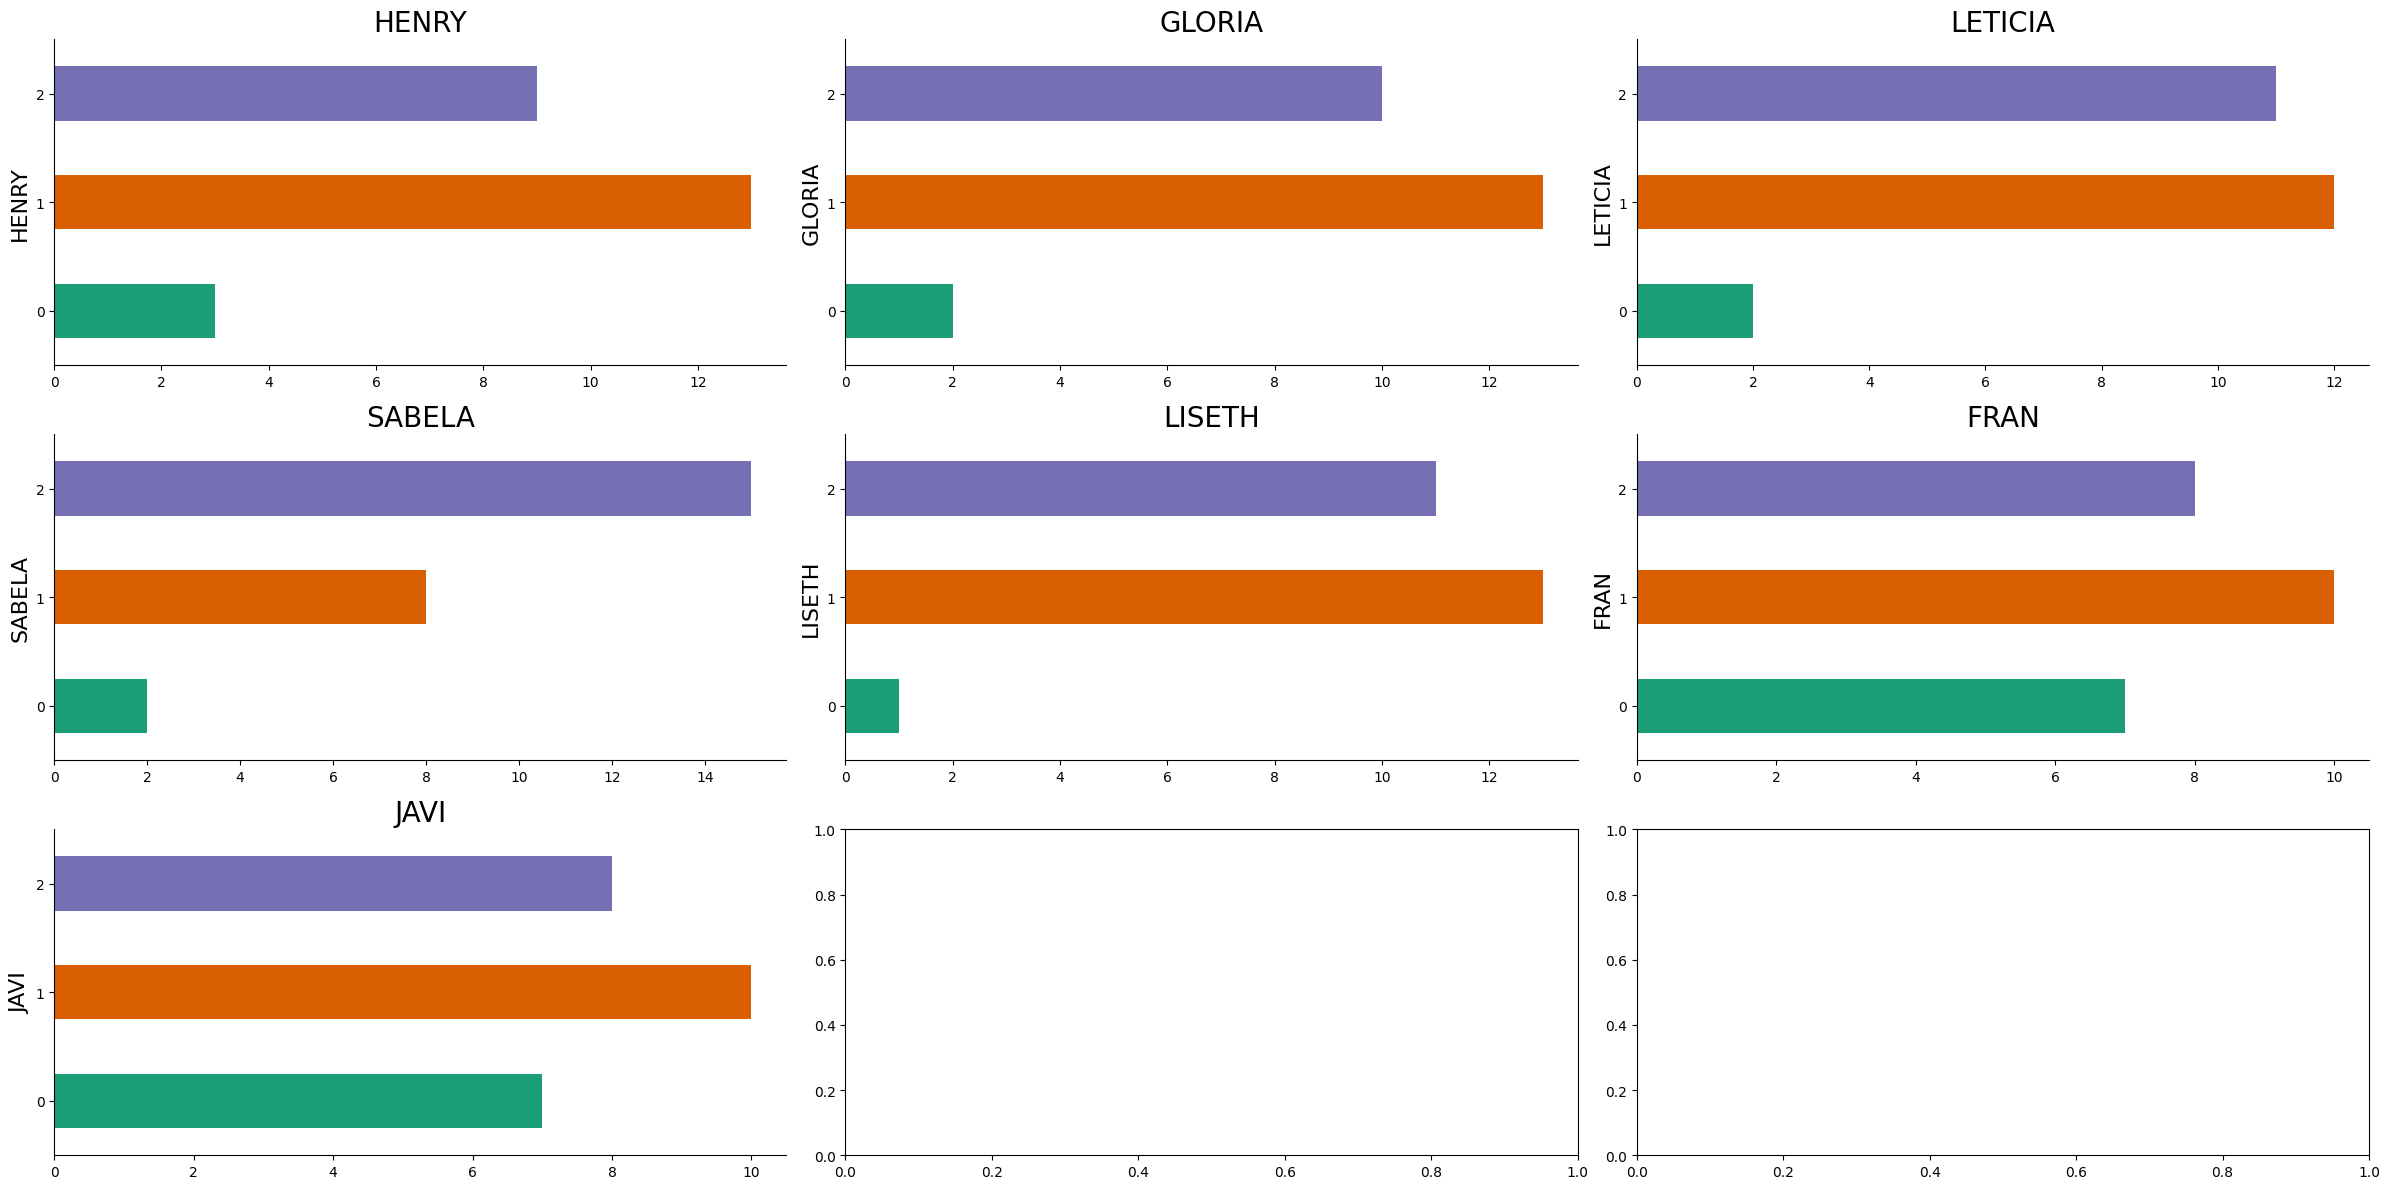

In [183]:

def doctor_histogram(df, colname, ax, title, mpl_palette_name='Dark2'):
  df[colname].value_counts().sort_index().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), ax=ax)
  ax.spines[['top', 'right',]].set_visible(False)
  ax.set_title(title, fontsize=20)

fig, axs = plt.subplots(3, 3, figsize=(24, 12))
axs = axs.flatten()

doctor_columns = ["HENRY", "GLORIA", "LETICIA", "SABELA", "LISETH", "FRAN", "JAVI"]

for i, colname in enumerate(doctor_columns):
    categorical_histogram(df, colname, ax=axs[i], title=colname)

plt.tight_layout()
plt.show()


In [196]:
for i, df in enumerate(dataframes):
    print(titles[i]+":")
    print(df['FINAL'].value_counts()), "\n")

Esofago:
2     9
0     8
1     4
NV    4
Name: FINAL, dtype: int64 

Fundus:
2     8
1     8
0     8
NV    1
Name: FINAL, dtype: int64 

Cuerpo:
0    14
2     8
1     3
Name: FINAL, dtype: int64 

Antro:
1     10
2      8
0      5
NV     2
Name: FINAL, dtype: int64 

Duodeno:
2     13
1      9
0      2
NV     1
Name: FINAL, dtype: int64 



In [204]:
dataframes[0]

,HENRY,GLORIA,LETICIA,SABELA,LISETH,FRAN,JAVI,FINAL
1,0,0,0,1,0,0,0,0
2,2,2,2,2,2,2,2,2
3,1,0,1,1,1,1,1,1
4,1,0,1,1,1,1,0,NV
5,2,2,2,2,2,2,2,2
6,1,0,1,1,1,1,1,1
7,2,1,1,2,1,1,1,2
8,2,2,2,2,2,2,2,2
9,0,0,0,1,0,0,0,0
10,1,0,1,1,1,1,1,NV


In [201]:
df_names = ["df_Esofago","df_Fundus","df_Cuerpo","df_Antro","df_Duodeno"]
for i,df in enumerate(dataframes):
    df_names[i] = df

In [ ]:
for df in dataframes:
    print(df)

In [207]:
df_names = ["df_Esofago","df_Fundus","df_Cuerpo","df_Antro","df_Duodeno"]
for i, df in enumerate(dataframes):
    df.to_excel(f'{df_names[i]}.xlsx', index=False)


In [212]:
df_Antro = pd.read_excel("/content/drive/MyDrive/EGD-Barcelona/data/Antro/df_Antro.xlsx")
df_Esofago = pd.read_excel("/content/drive/MyDrive/EGD-Barcelona/data/Esofago/df_Esofago.xlsx")
df_Fundus = pd.read_excel("/content/drive/MyDrive/EGD-Barcelona/data/Fundus/df_Fundus.xlsx")
df_Cuerpo = pd.read_excel("/content/drive/MyDrive/EGD-Barcelona/data/Cuerpo/df_Cuerpo.xlsx")
df_Duodeno = pd.read_excel("/content/drive/MyDrive/EGD-Barcelona/data/Duodeno/df_Duodeno.xlsx")

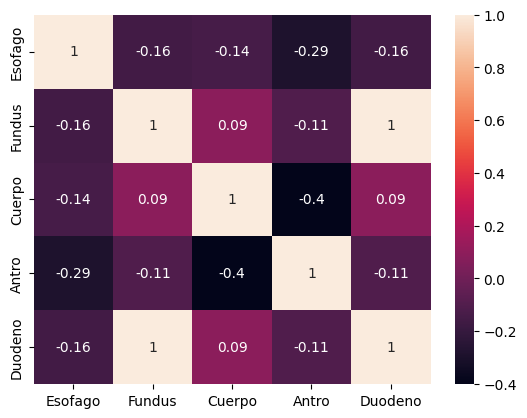

In [217]:
dataframes = [df_Esofago, df_Fundus, df_Cuerpo, df_Antro, df_Duodeno]

# Crea un nuevo DataFrame vacío para almacenar los datos de todas las regiones
df_all = pd.DataFrame()

# Itera sobre cada DataFrame y añade la columna 'FINAL' al DataFrame df_all
for i, df in enumerate(dataframes):
    # Reemplaza los valores no numéricos con NaN
    df['FINAL'] = pd.to_numeric(df['FINAL'], errors='coerce')
    # Imputa los valores NaN con la media de la columna
    df['FINAL'].fillna(df['FINAL'].mean(), inplace=True)
    # Añade la columna al DataFrame df_all
    df_all[titles[i]] = df['FINAL']

# Calcula la matriz de correlación
correlation_matrix = df_all.corr()

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True)
plt.show()